<a href="https://colab.research.google.com/github/shaking54/compression/blob/master/ImageCompressionUsingK_MeansAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

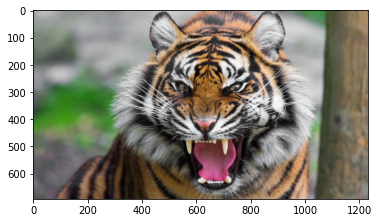

In [28]:
from skimage import io
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import os
import random
import cv2
image = cv2.imread('tiger.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [2]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [3]:
K = 16 #number of clusters
max_iters = 50 #number of times the k-mean should run

In [4]:

def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [5]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [6]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [7]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [8]:
initial_centroids = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

(16, 3)
(853776,)


In [9]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
print(np.shape(X_recovered))

(853776, 3)
(693, 1232, 3)


In [21]:

plt.imsave('tiger_s.png', X_recovered)

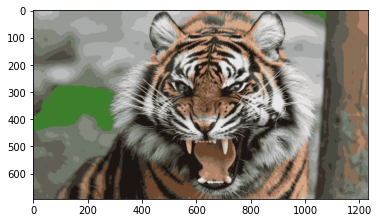

In [26]:
image_compressed = cv2.imread('tiger_s.png')
image_compressed = cv2.cvtColor(image_compressed, cv2.COLOR_BGR2RGB)
plt.imshow(image_compressed)

In [27]:

info = os.stat('tiger.png')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info = os.stat('tiger_s.png')
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")

size of image before running K-mean algorithm:  1077.625 KB
size of image after running K-mean algorithm:  294.658203125 KB
